In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib
import skimage
import os
import glob
from google.colab import auth, drive
from shutil import copyfile
from skimage import data, io, filters, color, img_as_ubyte
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2hsv

%matplotlib inline
print(skimage.__version__)

0.18.1


In [2]:
# Update scikit-image
# print('restart runtime')
!python -m pip install -U pip
!python -m pip install -U scikit-image

     |████████████████████████████████| 1.5MB 10.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 29.2 MB 48 kB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
drive.mount('/content/drive')
drive_path = 'drive/MyDrive/root_growth_data/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


contrast enhancement


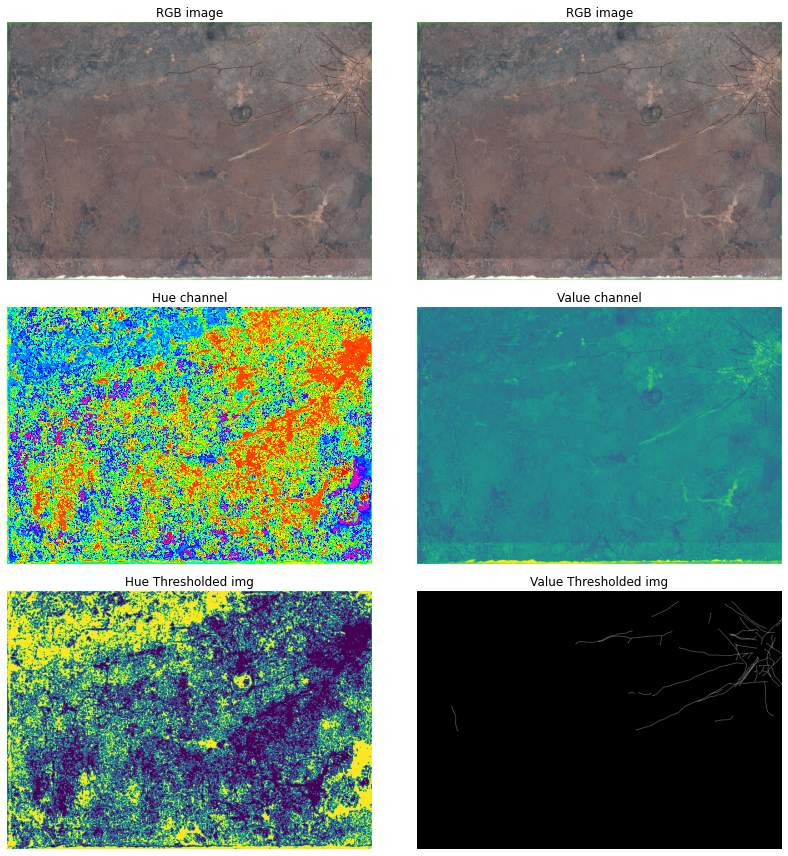

In [5]:
# RGB to HSV

# from skimage import data
# roots = skimage.io.imread(drive_path+'misc/root_spider_webs.jpg', as_gray=False)
# rgb_img = skimage.io.imread(drive_path+'misc/hydescan1_T001_L001_2018.09.13_033029_058_DYY.jpg', as_gray=False)
#rgb_img = skimage.io.imread(drive_path+'misc/hydescan1_T001_L001_2018.09.13_033029_058_DYY.jpg', as_gray=False)
root_bmp = skimage.io.imread(drive_path+'misc/root.bmp', as_gray=False)
rs_bmp = rescale(root_bmp, 0.25, anti_aliasing=True)
#rgb_img = data.coffee()
# print(rgb_img.shape)
# print(org_im.shape)

# contrast enhancement
print('contrast enhancement')
# rgb_img_cont = equalize_adapthist(rgb_img, kernel_size=3, clip_limit=0.01, nbins=300)

hsv_img = rgb2hsv(root_bmp)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]


value_threshold = 0.0 # value threshold to separate from background
bin_img_value = value_img == value_threshold #(value_img < 0.75) & (value_img > 0.4)
hue_threshold = 0.1 # value threshold to separate from background
bin_img_hue = hue_img > hue_threshold

fig, ax = plt.subplots(3,2, figsize=(12, 12))

ax[0,0].imshow(root_bmp)
ax[0,0].set_title("RGB image")
ax[0,0].axis('off')
ax[0,1].imshow(root_bmp)
ax[0,1].set_title("RGB image")
ax[0,1].axis('off')

ax[1,0].imshow(hue_img, cmap='hsv')
ax[1,0].set_title("Hue channel")
ax[1,0].axis('off')
ax[1,1].imshow(value_img)
ax[1,1].set_title("Value channel")
ax[1,1].axis('off')

ax[2,0].set_title("Hue Thresholded img")
ax[2,0].axis('off')
ax[2,0].imshow(bin_img_hue)
ax[2,1].set_title("Value Thresholded img")
ax[2,1].axis('off')
ax[2,1].imshow(bin_img_value, cmap=plt.cm.binary_r)

fig.tight_layout()

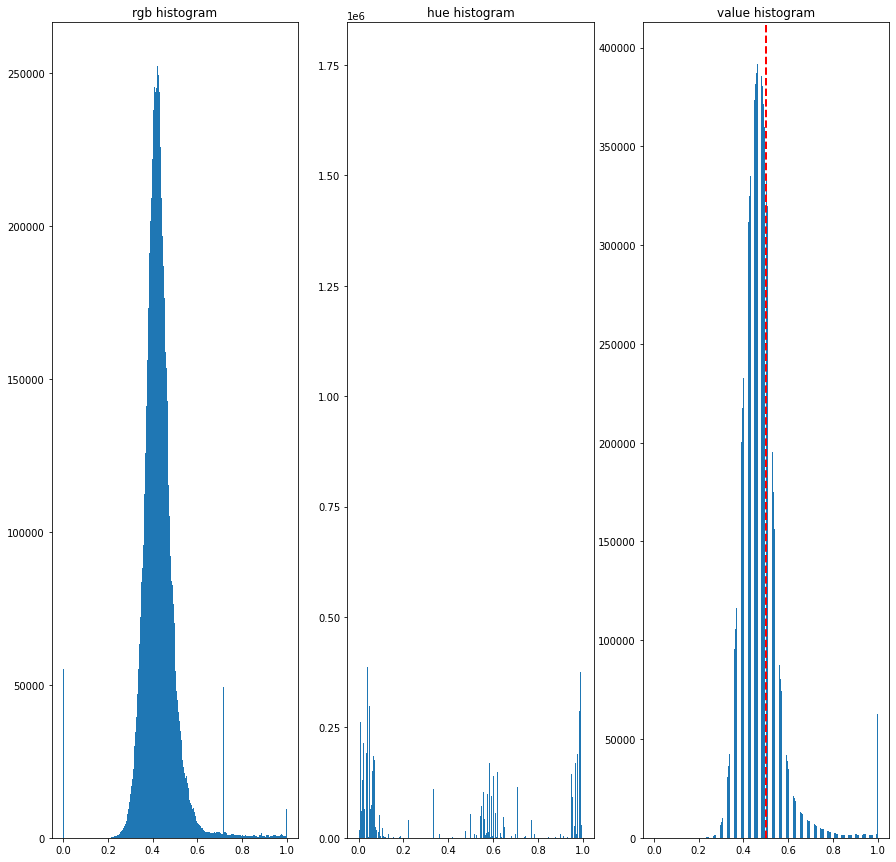

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,15))
_ = ax[0].hist(root_bmp.ravel(), 512)
_ = ax[0].set_title('rgb histogram')
_ = ax[1].set_title('hue histogram')
_ = ax[1].hist(hue_img.ravel(), 512)
_ = ax[2].hist(value_img.ravel(), 512)
_ = ax[2].set_title('value histogram')
_ = ax[2].axvline(x=0.5, color='r', linestyle='dashed', linewidth=2)

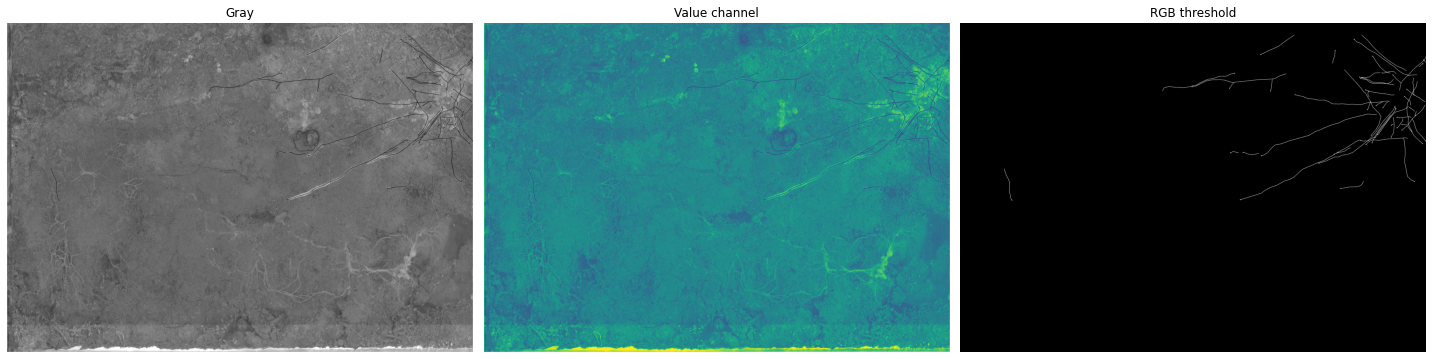

In [ ]:
root_bmp = skimage.io.imread(drive_path+'misc/root.bmp', as_gray=True)
#rs = rescale(root_bmp, 0.5)

value_threshold = 0.0 # value threshold to separate from background
bin_img_value = root_bmp == value_threshold 

fig, ax = plt.subplots(1,3, figsize=(20, 20))

ax[0].imshow(root_bmp, cmap=plt.cm.gray)
ax[0].set_title("Gray")
ax[0].axis('off')

ax[1].imshow(value_img)
ax[1].set_title("Value channel")
ax[1].axis('off')

ax[2].set_title("RGB threshold")
ax[2].axis('off')
ax[2].imshow(bin_img_value, cmap=plt.cm.binary_r)

fig.tight_layout()

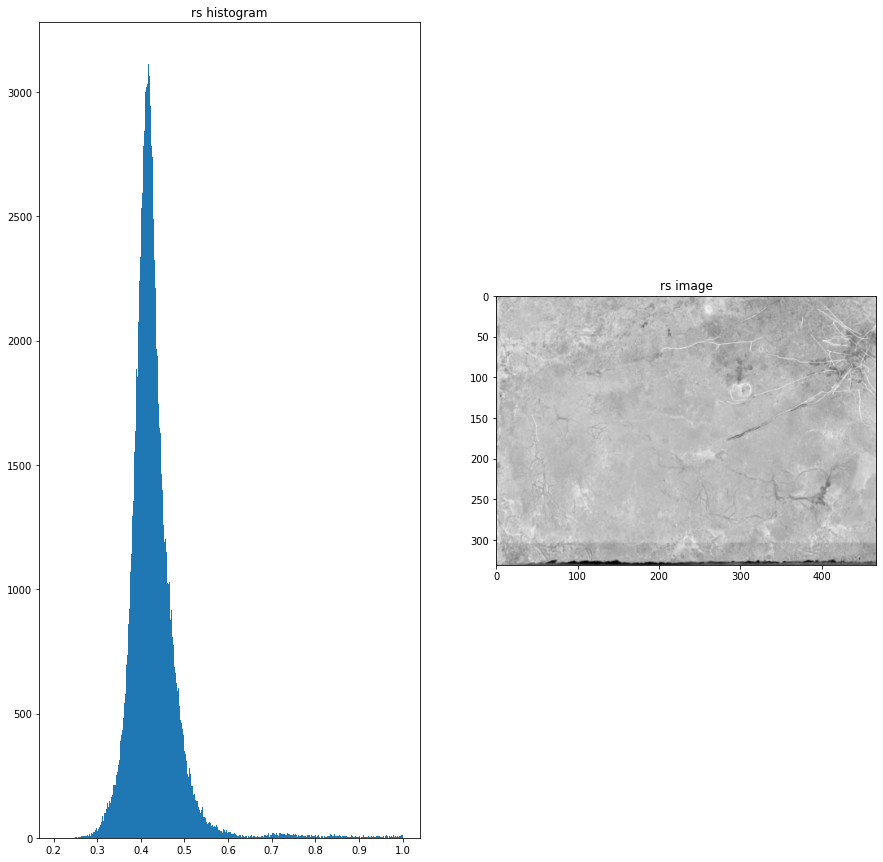

In [ ]:
# invert image
inv_rs = skimage.util.invert(rs)

fig, ax = plt.subplots(1,2, figsize=(15,15))
_ = ax[0].hist(rs.ravel(), 512)
_ = ax[0].set_title('rs histogram')
_ = ax[1].set_title('rs image')
_ = ax[1].imshow(inv_rs, cmap=plt.cm.binary_r)


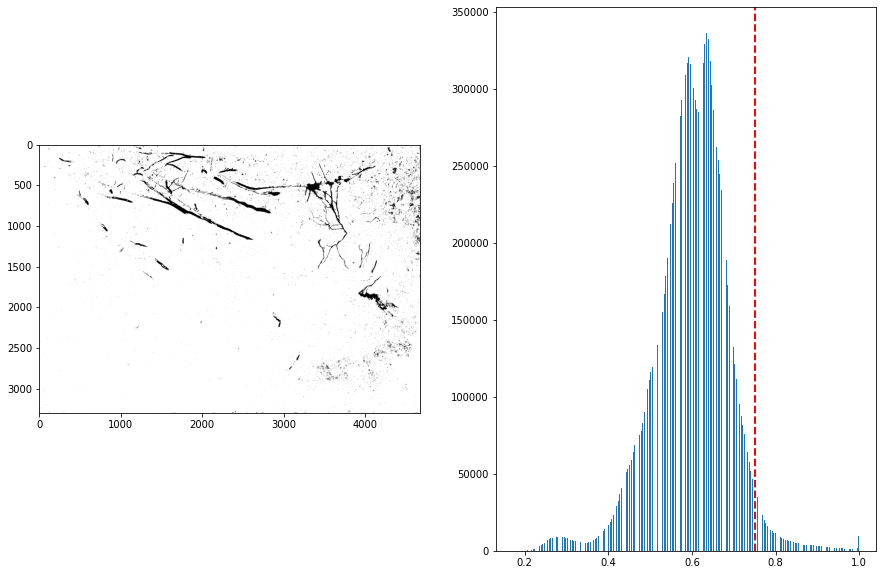

In [ ]:
hue_threshold = 0.1 # value threshold to separate from background
bin_img_hue = hue_img < hue_threshold
fig, ax = plt.subplots(1,2, figsize=(15,10))
_ = ax[0].imshow(bin_img_value, cmap=plt.cm.binary)
_ = ax[1].hist(value_img.ravel(), 512)
_ = ax[1].axvline(x=value_threshold, color='r', linestyle='dashed', linewidth=2)

# Generate binaries

In [ ]:
training_data_loc =  'drive/MyDrive/root_growth_data/Root_Project/training_images/'
orig_data_loc = 'drive/MyDrive/root_growth_data/'
all_data = 'drive/MyDrive/root_growth_data/'
scanners = ['Hyde_Scanner1', 'Hyde_Scanner2', 'Hyde_Scanner3', 'Varrio_Scanner2','Varrio_Scanner3']

In [ ]:
 # !!! No need to run this code again !!!
value_threshold = 0.0 # value threshold to separate from background
bmp = 'bmp'
png = 'png'
for d in os.listdir(training_data_loc):
  #img_list = os.listdir(training_data_loc+d)
  print(f'{d}')
  for c in os.walk(f'{training_data_loc}{d}'):
    if 'binary_imgs' in c[1]: # make sure we use top level dir
      print(c[2])
      for img in c[2]:
        print(f'{training_data_loc}{d}/{img}')
        root_bmp = skimage.io.imread(f'{training_data_loc}{d}/{img}', as_gray=True)
        bin_img_value = root_bmp == value_threshold
        skimage.io.imsave(f'{training_data_loc}{d}/binary_imgs/{img.replace(bmp, png)}', img_as_ubyte(bin_img_value), check_contrast=False)

Hyde scanner3
['2018.07.15.bmp', '2018.07.25.bmp', '2018.08.25.bmp', '2018.09.25 moisture.bmp', '2018.10.25 moisture.bmp', '2019.05.02.bmp', '2019.05.25.bmp', '2019.06.25.bmp', '2019.07.25.bmp', '2019.08.25.bmp', '2019.09.25.bmp', '2019.10.25.bmp']
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2018.07.15.bmp
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2018.07.25.bmp
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2018.08.25.bmp
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2018.09.25 moisture.bmp
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2018.10.25 moisture.bmp
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2019.05.02.bmp
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2019.05.25.bmp
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner3/2019.06.25.bmp
drive/MyDrive/root_gr

In [ ]:
# Show originals of traced images
scanner_folders = ['Hyder']
for d in os.listdir(training_data_loc):
  print(f'{d}')
  for c in os.walk(f'{training_data_loc}{d}'):
    if 'binary_imgs' in c[1]:
      print(c[2])

Hyde scanner3
['2018.07.15.bmp', '2018.07.25.bmp', '2018.08.25.bmp', '2018.09.25 moisture.bmp', '2018.10.25 moisture.bmp', '2019.05.02.bmp', '2019.05.25.bmp', '2019.06.25.bmp', '2019.07.25.bmp', '2019.08.25.bmp', '2019.09.25.bmp', '2019.10.25.bmp']
Hyde scanner2
['2018.05.23.bmp', '2018.06.20.bmp', '2018.07.16.bmp', '2018.08.16.bmp', '2018.09.16.bmp', '2018.10.16.bmp', '2018.10.30 moisture.bmp', '2019.05.22 worm.bmp', '2019.06.22.bmp', '2019.07.15.bmp', '2019.08.15 worm.bmp', '2019.09.15 moisture.bmp', '2019.10.05 moisture.bmp']
Varrio scanner3
['2018.07.15.bmp', '2018.07.30 worm.bmp', '2018.08.15.bmp', '2018.09.15.bmp', '2018.08.25.bmp', '2019.06.10.bmp', '2019.06.15 worm.bmp', '2019.07.15.bmp', '2019.08.15.bmp', '2019.10.10.bmp', '2019.09.15.bmp', '2018.09.25.bmp']
Varrio scanner2
['2018.07.15.bmp', '2018.07.30.bmp', '2018.08.15 moisture.bmp', '2018.09.15.bmp', '2019.06.15.bmp', '2019.07.15.bmp', '2019.08.15.bmp', '2019.09.20.bmp', '2018.07.21.bmp', '2018.08.23 moisture.bmp', '2019.0

In [ ]:
# copy original images to match the traces images
# !!! No need to run this code again !!!
# TODO: Function specific to my dir structure, can be made generic

train_loc = f'{training_data_loc}{folder}'
orig_loc = f'{orig_data_loc}{scanner}/{scanner}'

def find_original_images():
  """
  Find the original images matching the ones that have been traced.

  Walks through the folder of traced images and finding the counter part of the original image.
  The date string in the file is used to identify matching images
  """
  for scanner in scanners:
    s = scanner.replace('_', ' ').lower()
    print(f'Scanner: {s}')
    for folder in os.listdir(training_data_loc):
      if s == folder.lower():
        # find originals and copy to training folder
        orig_loc = f'{orig_data_loc}{scanner}/{scanner}'
        train_loc = f'{training_data_loc}{folder}'
        print(f'{orig_loc}: images {len(list(os.walk(orig_loc))[0][2])}')
        print(f'{train_loc}: images {len(list(os.walk(train_loc))[0][2])}')
        for img in list(os.walk(train_loc))[0][2]:
          # pick files in top level dir, avoid nested dirs
          imgs_in_orig_folder = [i.split('_')[3] for i in os.listdir((f'{orig_data_loc}{scanner}/{scanner}'))]
          img_ = img.replace('.bmp', '').split(' ')[0]
          if img_ in imgs_in_orig_folder:
            print(f'image found: {img}')
            # o_img = f'*{img_}*.jpg'
            # src = glob.glob(f'{orig_loc}/{o_img}')[0]
            # dst = img.replace('.bmp', '_orig.jpg')
            # copyfile(src, f'{train_loc}/orig_imgs/{dst}')
          else:
            print(f'image not found {img}')
  print('Completed copying images')

In [ ]:
find_original_images()

Scanner: hyde scanner1
drive/MyDrive/root_growth_data/Hyde_Scanner1/Hyde_Scanner1: images 393
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner1: images 13
image found: 2018.07.24.bmp
image found: 2018.10.31.bmp
image found: 2018.10.13.bmp
image found: 2018.09.10.bmp
image found: 2018.08.30.bmp
image found: 2018.08.24.bmp
image found: 2019.05.04.bmp
image found: 2019.07.02.bmp
image found: 2019.06.07.bmp
image found: 2019.07.23.bmp
image found: 2019.08.12.bmp
image found: 2019.09.16.bmp
image found: 2019.09.30.bmp
Scanner: hyde scanner2
drive/MyDrive/root_growth_data/Hyde_Scanner2/Hyde_Scanner2: images 423
drive/MyDrive/root_growth_data/Root_Project/training_images/Hyde scanner2: images 13
image found: 2018.05.23.bmp
image found: 2018.06.20.bmp
image found: 2018.07.16.bmp
image found: 2018.08.16.bmp
image found: 2018.09.16.bmp
image found: 2018.10.16.bmp
image found: 2018.10.30 moisture.bmp
image found: 2019.05.22 worm.bmp
image found: 2019.06.22.bmp
image found: